In [235]:
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

<Axes: >

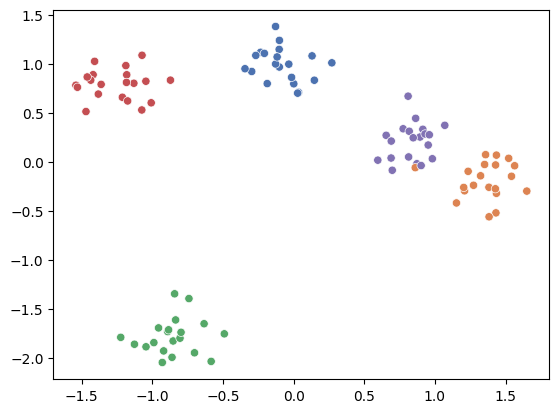

In [236]:
centers = 5
x_trn, true_labels = make_blobs(n_samples=100, centers=centers, random_state=42)
x_trn = np.array(StandardScaler().fit_transform(x_trn))
sns.scatterplot(x=[X[0] for X in x_trn],
                y=[X[1] for X in x_trn],
                hue=true_labels,
                palette="deep",
                legend=None
                )

In [237]:
def euclidean(point, data):
    """
    Euclidean distance between point & data.
    Point has dimensions (m,), data has dimensions (n,m), and output will be of size (n,).
    """
    return np.sqrt(np.sum((point - data)**2, axis=1))

In [238]:
def euclidean_2(point, cluster):
    return np.sum(np.sqrt((point - cluster)**2))

In [239]:
class KMeans:
    def __init__(self, clusters, max_iter) -> None:
        self.clusters = clusters
        self.max_iter = max_iter

    def fit(self, x_train):
        min_, max_ = np.min(x_train, axis=0), np.max(x_train, axis=0)
        self.centroids = [np.random.uniform(min_, max_) for _ in range(self.clusters)]
        iteration = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            # Sort each datapoint, assigning to nearest centroid
            sorted_points = [[] for _ in range(self.clusters)]
            for x in x_train:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)
            # Push current centroids to previous, reassign centroids as mean of the points belonging to them
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
                    self.centroids[i] = prev_centroids[i]
            iteration += 1

    def predict(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idx


In [240]:
kmeans = KMeans(5, 6000)

In [241]:
kmeans.fit(x_trn)

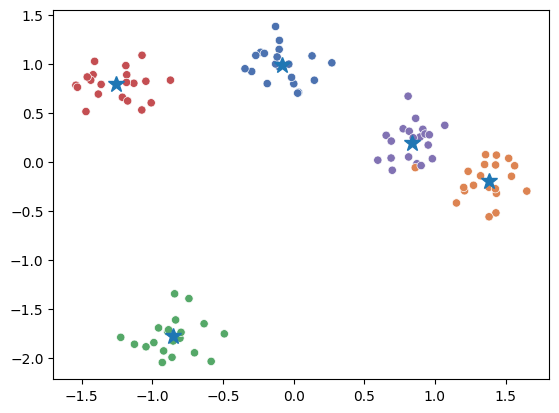

In [242]:
class_centers, classification = kmeans.predict(x_trn)
sns.scatterplot(x=[X[0] for X in x_trn],
                y=[X[1] for X in x_trn],
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         '*',
         markersize=12,
         )
plt.show()

In [243]:
def distance(point1, point2):
    return np.sqrt((point1[0] + point2[0])**2 + (point1[1] + point2[1])**2)

In [244]:
class Maxima:
    def __init__(self, max_iter):
        self.clusters = 1
        self.centroids = []
        self.max_iter = max_iter


    def fit(self, x_trn):
        x_train = np.copy(x_trn)
        self.centroids.append(x_train[0])
        dists = []
        for x in x_train:
            x_dist = []
            for centr in self.centroids:
                x_dist.append(distance(x, centr))
            dists.append(x_dist)
        
        indx = np.argmax(dists)//2
        self.centroids.append(x_train[indx])
        self.clusters += 1
        T = distance(self.centroids[0], self.centroids[1])/2
        iteration = 0
        while iteration < self.max_iter:
            dists = []
            [dists.append([]) for _ in self.centroids]
            for x in x_train:
                c_dist = []
                [c_dist.append(distance(x, centr)) for centr in self.centroids]
                min_i = np.argmin(c_dist)
                dists[min_i].append(c_dist[min_i])

            print(dists)
            prototypes_indxs = []
            for dist in dists:
                if len(dist) > 0:
                    prototypes_indxs.append(np.argmax(dist))

            k = 0
            for i in range(len(prototypes_indxs)):
                P = x_train[prototypes_indxs[i]]
                D = distance(P, self.centroids[i])
                if D < T:
                    k += 1
                else:
                    self.centroids.append(P)
                    self.clusters+=1

            if k == self.clusters:
                print('Learning has ended')
                return
            
            dists_sum = 0
            for i in range(self.clusters-1):
                dists_sum += distance(self.centroids[i], self.centroids[i+1])

            T = dists_sum /( self.clusters * (self.clusters-1))
            iteration += 1

    def predict(self, X):
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroid_idxs.append(centroid_idx)
        return self.centroids, centroid_idx

In [245]:
maximin = Maxima(2)
maximin.fit(x_trn)

[[0.9652438113013595, 0.9473907192171331, 2.0897160593360584, 0.9574999187425032, 1.0151591912972278, 0.8743689347619706, 1.9656847176674868, 1.0644958212553655, 1.133929321681815, 1.710117012915644, 1.8783735156270838, 0.988908411864087, 2.220311999676577, 1.923149752824338, 1.158260333845833, 1.9738241156841252, 1.1903774687634507, 2.0688057168497664, 0.8807673376743312, 0.8690759963180362, 0.9194378509518257, 1.9898004093996007, 0.6894356610126808, 1.1431279743971923, 2.012961043324407, 1.0800893800454527, 1.092094598681458, 2.1906251506629486, 1.0831800594529948, 1.1064938824365875, 1.1753299098950993, 0.9928216306252097, 2.1824315038269444, 2.36500726446381, 1.1326363393076286, 0.7346440039494708, 2.3827133563108993, 1.8411723669929476, 2.359976121298904, 1.1606955111281894, 1.1463257046047683, 2.2502121053554807, 2.014427275500619, 0.999259421460396, 2.2663430385787846, 0.8225696450308856, 1.0570769362984096, 0.9557531195218057, 2.239108345709762, 0.8571306222932346, 0.6117506612

In [246]:
print(maximin.centroids)
print(maximin.clusters)

[array([-0.74102254, -1.39810733]), array([-1.1877634 ,  0.97886226]), array([-1.17511864,  0.61813292]), array([0.89482252, 0.2501036 ]), array([-0.03414482,  0.99358712])]
5


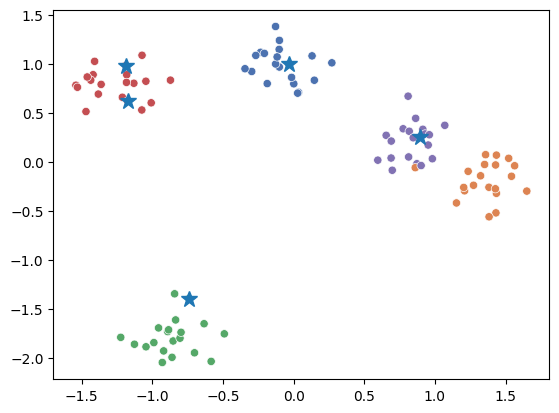

In [247]:
class_centers, classification = maximin.predict(x_trn)
sns.scatterplot(x=[X[0] for X in x_trn],
                y=[X[1] for X in x_trn],
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in maximin.centroids],
         [y for _, y in maximin.centroids],
         '*',
         markersize=12,
         )
plt.show()